In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from copy import deepcopy
from scipy.optimize import curve_fit
from scipy.stats import norm, kstest, probplot, linregress

In [2]:
# Load data
df = pd.read_excel("data_flowdike.xlsx")

# Select data with hpeak > 1cm
df = df[df['hpeak'] >= 0.01]

# Match colors
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:cyan"]
conv_dict = {expid:c for expid, c in zip(list(np.unique(df['experiment_id'])), colors)}
df['color'] = df['experiment_id'].map(conv_dict)

# Calculate dimensionless values
df['upeakd'] = df['upeak'] / np.sqrt(9.81 * df['Hs'])
df['hpeakd'] = df['hpeak'] / df['Hs']
df['vtd'] = df['vt'] / df['Hs']**2

<h1>3.1 - Expected Relations of Peak Flow Characteristics</h1>
<h3>Expected fits for peak flow velocity</h3>

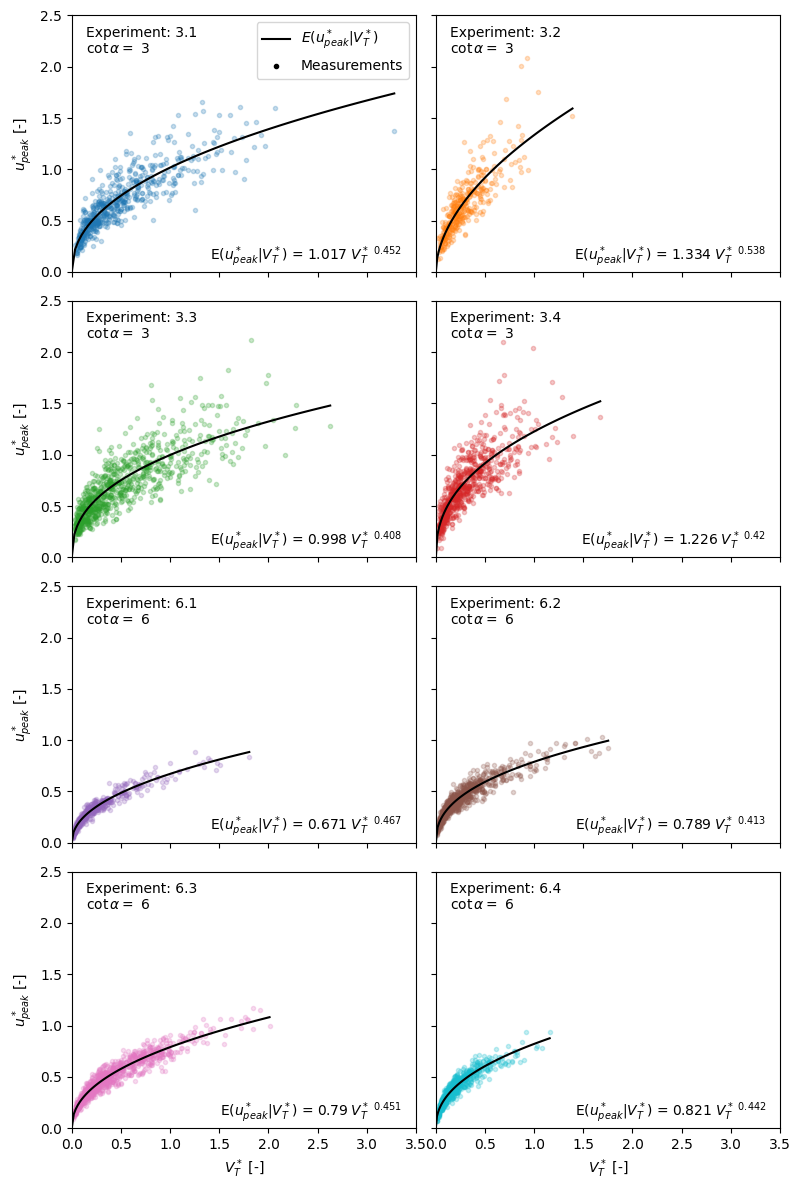

In [3]:
# Curve
def curve_exp(x, a, b):
    return a * x ** b

# Plot
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

# Per experiment
i = 0
for expid, _df in df.groupby(by="experiment_id"):

    # Fit curve
    paramu, _ = curve_fit(curve_exp, _df['vtd'], _df['upeakd'])
    df.loc[df['experiment_id'] == expid, 'au'] = paramu[0]
    df.loc[df['experiment_id'] == expid, 'bu'] = paramu[1]
    _x = np.linspace(0, np.max(_df['vtd']), 100)
    _u = curve_exp(_x, *paramu)

    # Plot data and fit
    axs[i].plot(_df['vtd'], _df['upeakd'], ".", color=_df['color'].iloc[0], alpha=0.25)
    axs[i].plot(_x, _u, color="black", label=r"$E(u^*_{peak}|V^*_{T})$")

    # Legend and text
    axs[i].plot([-10], [-10], ".", color="black", label="Measurements")
    axs[i].text(3.36, 0.032, r"E($u^*_{peak}|V^*_{T}$) = " + str(round(paramu[0], 3)) + r"$\; V^*_{T} \: {}^{" + str(round(paramu[1], 3)) + r"}$", ha="right", va="bottom")
    axs[i].text(0.14, 2.4, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    i+=1

[axs[i].set_ylabel(r"$u^*_{peak}$ [-]") for i in [0, 2, 4, 6]]
[axs[i].set_xlabel(r"$V^*_{T}$ [-]") for i in [6, 7]]
axs[0].legend(loc="upper right", prop={'size': 10})
axs[0].set_xlim(0, 3.5)
axs[0].set_ylim(0, 2.5)

fig.tight_layout()
fig.align_labels()
plt.show()

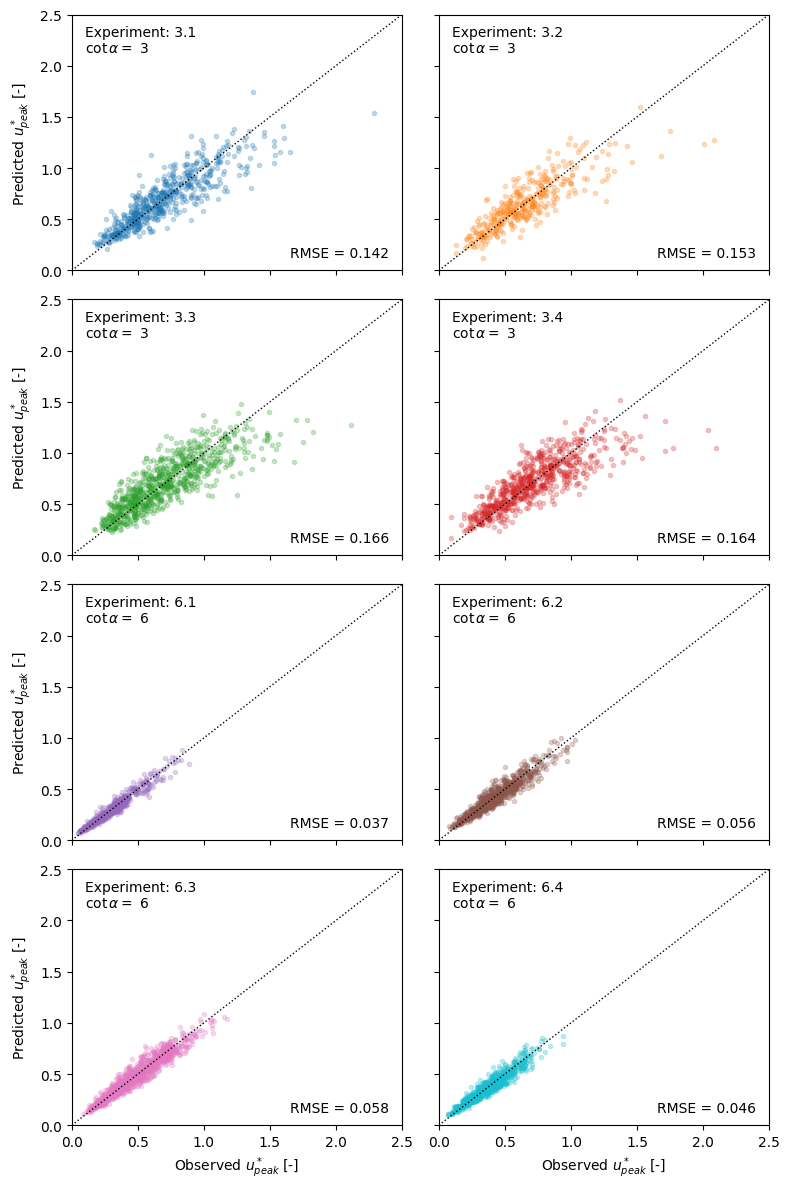

In [4]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):

    # Get upeak* and predicted upeak*
    y = _df['upeakd']
    ypred = curve_exp(_df['vtd'], _df['au'], _df['bu'])

    # Plot
    axs[i].plot(y, ypred, ".", color=_df['color'].iloc[0], alpha=0.25, label="Measurements")
    axs[i].plot([0, 3], [0, 3], ":", color="black", lw=1)

    # Test
    axs[i].text(0.1, 2.4, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")

    # RMSE
    rmse = np.sqrt(np.sum((y - ypred)**2) / len(y))
    axs[i].text(2.4, 0.1, f"RMSE = {round(rmse, 3)}", ha="right", va="bottom")
    i+=1

axs[0].set_xlim(0, 2.5)
axs[0].set_ylim(0, 2.5)
[axs[i].set_xlabel(r"Observed $u^*_{peak}$ [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"Predicted $u^*_{peak}$ [-]") for i in [0, 2, 4, 6]]

fig.tight_layout()
fig.align_labels()
plt.show()

<h3>Expected fits for peak flow thickness</h3>

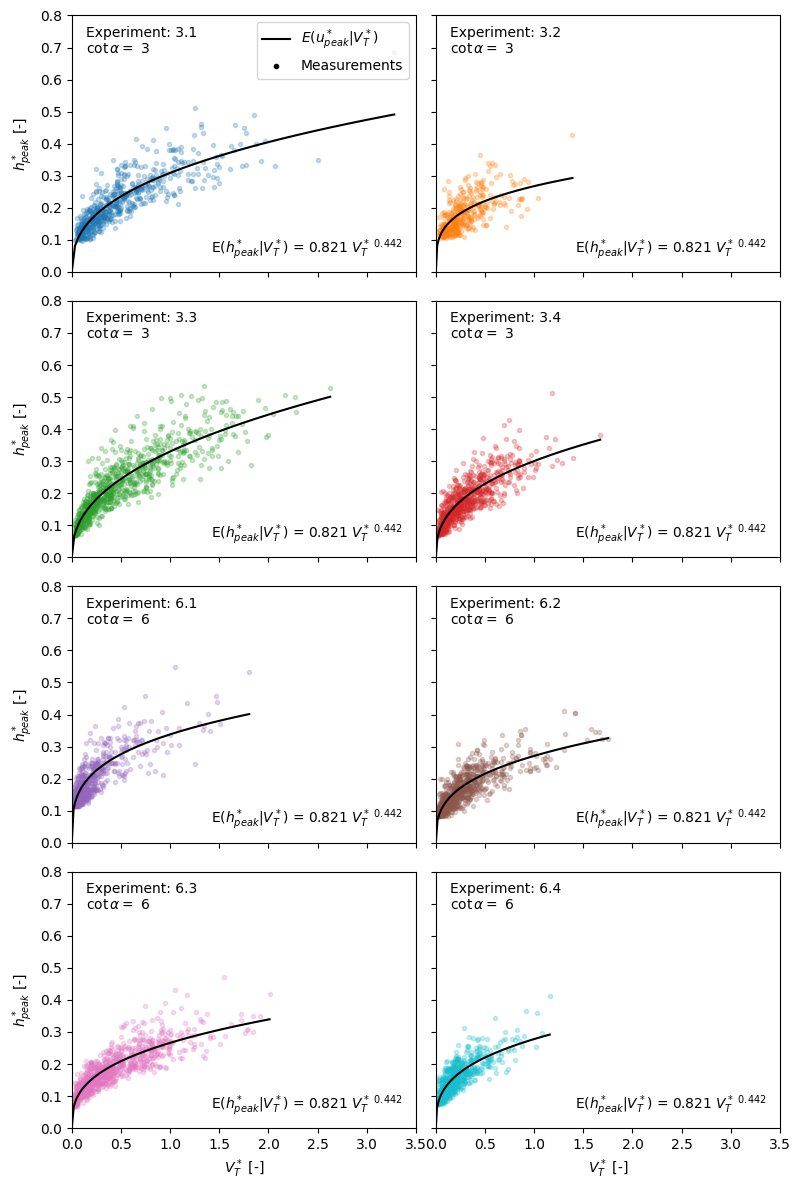

In [5]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

# Per experiment
i = 0
for expid, _df in df.groupby(by="experiment_id"):

    # Fit curve
    paramh, _ = curve_fit(curve_exp, _df['vtd'], _df['hpeakd'])
    df.loc[df['experiment_id'] == expid, 'ah'] = paramh[0]
    df.loc[df['experiment_id'] == expid, 'bh'] = paramh[1]
    _x = np.linspace(0, np.max(_df['vtd']), 100)
    _u = curve_exp(_x, *paramh)

    # Plot data and fit
    axs[i].plot(_df['vtd'], _df['hpeakd'], ".", color=_df['color'].iloc[0], alpha=0.25)
    axs[i].plot(_x, _u, color="black", label=r"$E(u^*_{peak}|V^*_{T})$")

    # Legend and text
    axs[i].plot([-10], [-10], ".", color="black", label="Measurements")
    axs[i].text(3.36, 0.032, r"E($h^*_{peak}|V^*_{T}$) = " + str(round(paramu[0], 3)) + r"$\; V^*_{T} \: {}^{" + str(round(paramu[1], 3)) + r"}$", ha="right", va="bottom")
    axs[i].text(0.14, 0.768, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    i+=1

[axs[i].set_ylabel(r"$h^*_{peak}$ [-]") for i in [0, 2, 4, 6]]
[axs[i].set_xlabel(r"$V^*_{T}$ [-]") for i in [6, 7]]
axs[0].legend(loc="upper right", prop={'size': 10})
axs[0].set_xlim(0, 3.5)
axs[0].set_ylim(0, 0.8)

fig.tight_layout()
fig.align_labels()
plt.show()

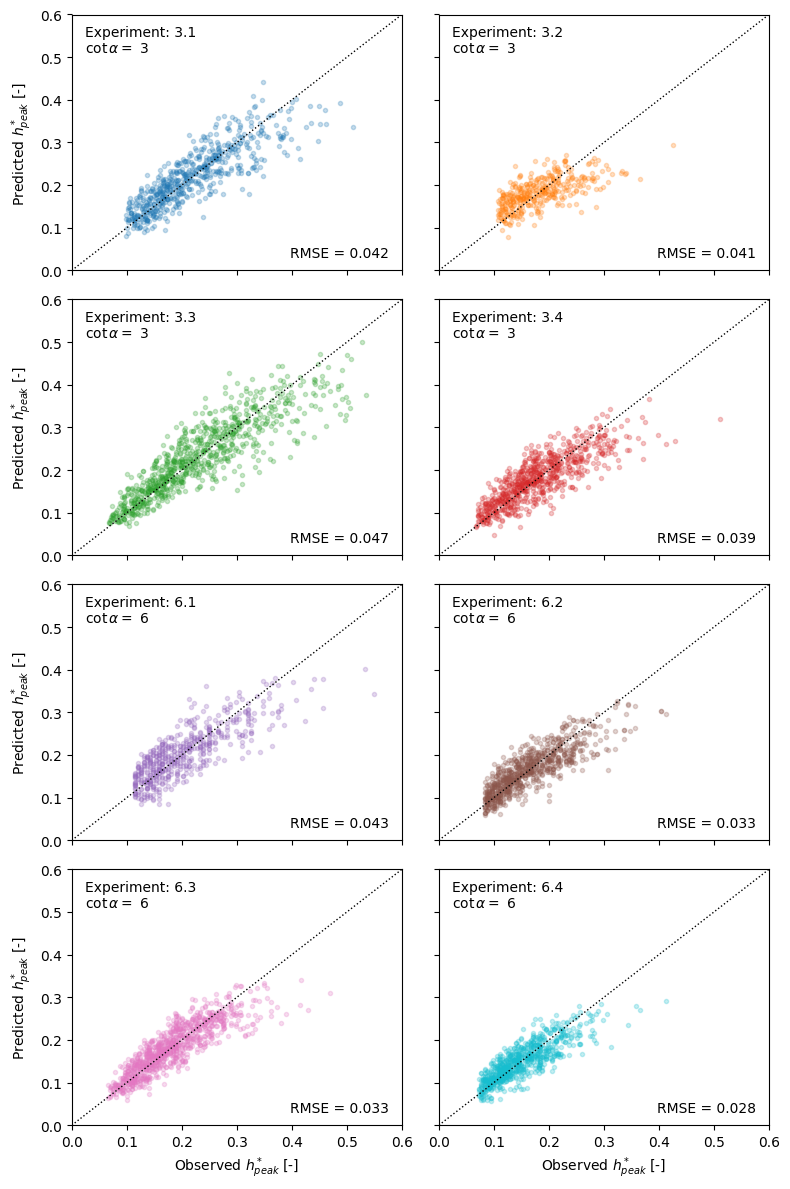

In [6]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):

    # Get upeak* and predicted upeak*
    y = _df['hpeakd']
    ypred = curve_exp(_df['vtd'], _df['ah'], _df['bh'])

    # Plot
    axs[i].plot(y, ypred, ".", color=_df['color'].iloc[0], alpha=0.25, label="Measurements")
    axs[i].plot([0, 3], [0, 3], ":", color="black", lw=1)

    # Test
    axs[i].text(0.024, 0.576, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")

    # RMSE
    rmse = np.sqrt(np.sum((y - ypred)**2) / len(y))
    axs[i].text(0.576, 0.024, f"RMSE = {round(rmse, 3)}", ha="right", va="bottom")
    i+=1

axs[0].set_xlim(0, 0.6)
axs[0].set_ylim(0, 0.6)
[axs[i].set_xlabel(r"Observed $h^*_{peak}$ [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"Predicted $h^*_{peak}$ [-]") for i in [0, 2, 4, 6]]

fig.tight_layout()
fig.align_labels()
plt.show()

<h1>3.2 - Analysis of Variations in Peak Flow Characteristics</h1>

<h3>Calculate residuals</h3>

In [7]:
# Per experiment
for expid, _df in df.groupby(by="experiment_id"):
    
    # Marginals
    ru = np.log(_df['upeakd']) - np.log(curve_exp(_df['vtd'], _df['au'], _df['bu']))
    rh = np.log(_df['hpeakd']) - np.log(curve_exp(_df['vtd'], _df['ah'], _df['bh']))
    
    # Adjust
    muu, _ = norm.fit(ru)
    muh, _ = norm.fit(rh)

    # Calculate residuals
    df.loc[df['experiment_id'] == expid, 'ru'] = np.log(_df['upeakd']) - np.log(curve_exp(_df['vtd'], _df['au'], _df['bu'])) - muu
    df.loc[df['experiment_id'] == expid, 'rh'] = np.log(_df['hpeakd']) - np.log(curve_exp(_df['vtd'], _df['ah'], _df['bh'])) - muh

<h3>Normal distributions on residuals of peak flow velocity</h3>

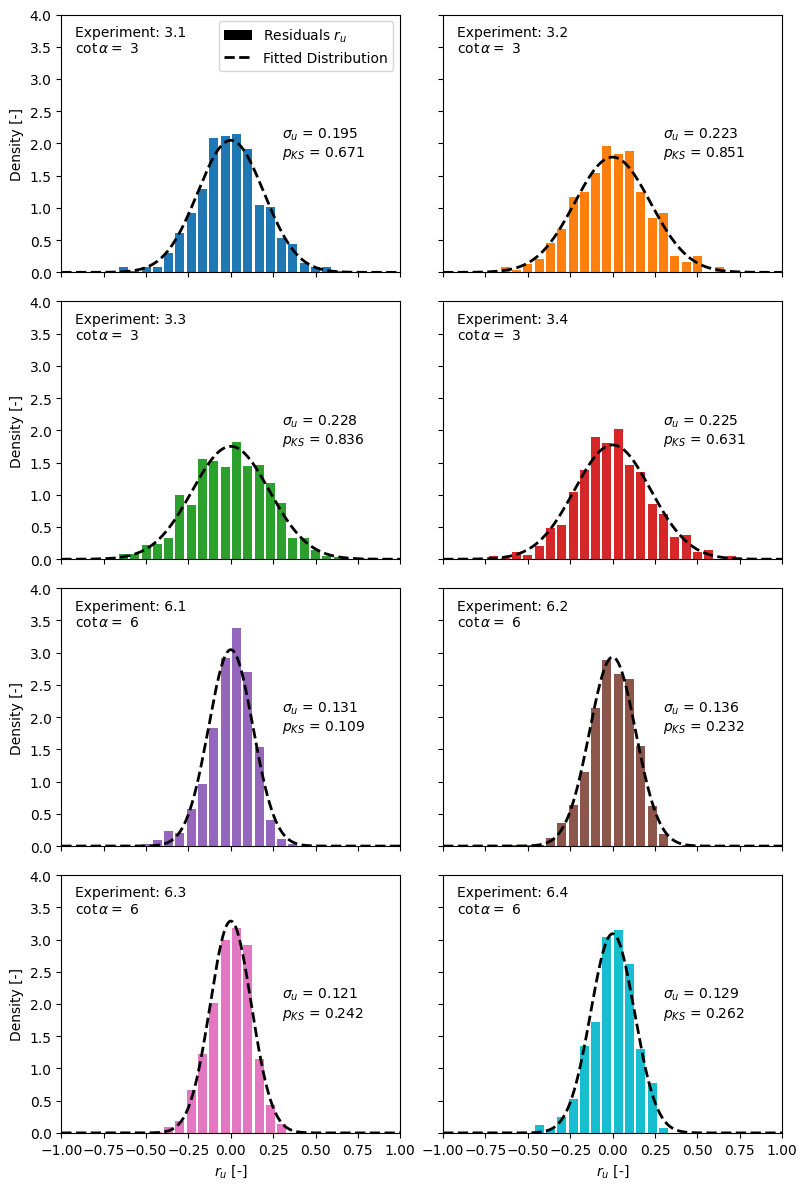

In [8]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8, 12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Fit on residuals
    mu, sigma = norm.fit(_df['ru'])
    df.loc[df['experiment_id'] == expid, 'sigma_u'] = sigma
    
    # Hist
    axs[i].hist(_df['ru'], bins=30, range=[-1.0, 1.0], density=True, color=_df['color'].iloc[0], rwidth=0.8)
    axs[i].hist(_df['ru']-80, bins=30, range=[-80, -79], color="black", rwidth=0.8, label=r"Residuals $r_{u}$") # Legend
    _x = np.linspace(-1, 1, 1000)
    axs[i].plot(_x, norm(mu, sigma).pdf(_x), "--", color="black", lw=2, label="Fitted Distribution")
    
    # KStest
    ks_statistic, ks_p_value = kstest(_df['ru'], 'norm', args=(mu, sigma))
    axs[i].text(0.3, 2.0, r"$\sigma_{u}$ = " + str("{:.3f}".format(round(sigma,3))) + "\n" + r"$p_{KS}$ = " + str("{:.3f}".format(round(ks_p_value,4))), ha='left', va='center')

    # Text
    axs[i].text(-0.92, 3.84, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

[axs[i].set_xlabel(r"$r_{u}$ [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"Density [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="upper right", prop={'size': 10})
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(0, 4)

fig.tight_layout()
fig.align_labels()
plt.show()

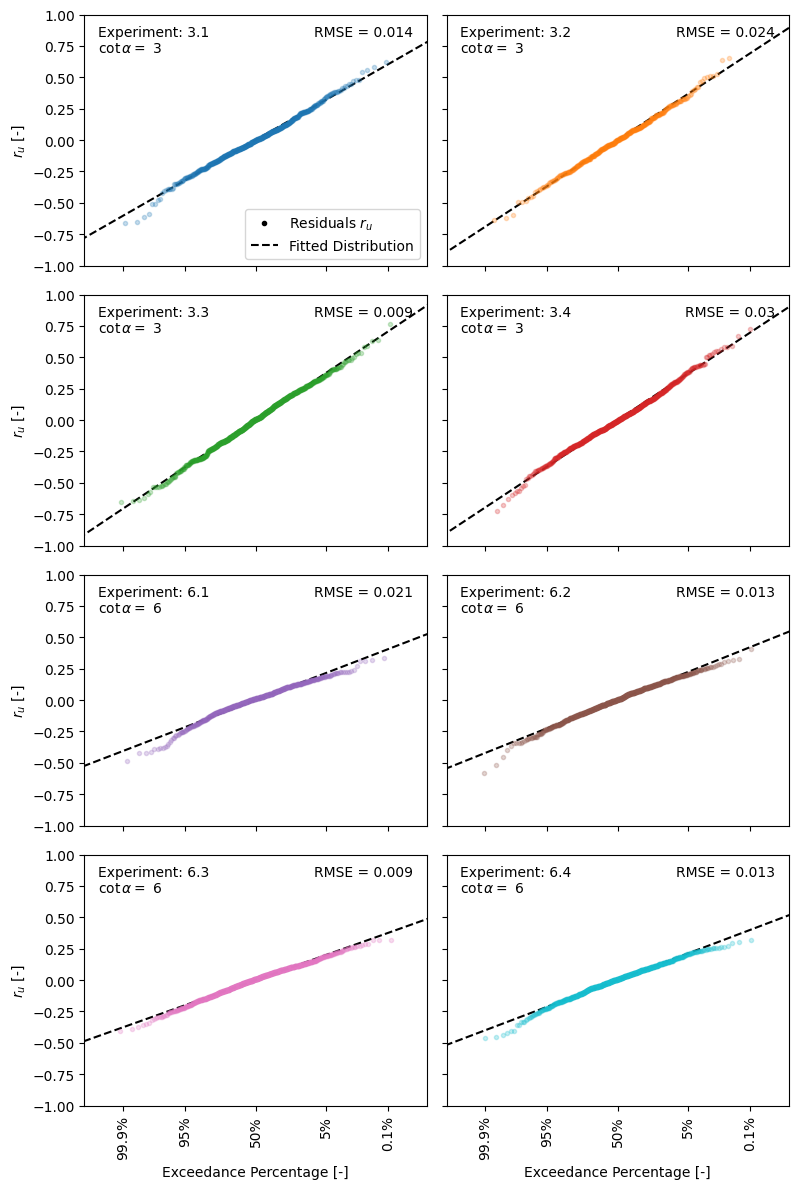

In [9]:
# Plot all
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Residuals
    mu, sigma = norm.fit(_df['ru'])
    data = probplot(_df['ru'])
    
    # Plot
    axs[i].plot(data[0][0], data[0][1], ".", color=_df['color'].iloc[0], alpha=0.25, zorder=3)
    axs[i].plot([-80], [-80], ".", color="black", label=r"Residuals $r_{u}$")
    axs[i].plot([-5, 5], [mu - 5 * sigma, mu + 5 * sigma], "--", color="black", label="Fitted Distribution")
    
    # RMSE
    _y = data[0][1]
    _ypred = data[1][1] + data[0][0] * data[1][0]
    rmse = np.sqrt(np.sum((_y - _ypred)**2) / len(_y))
    axs[i].text(3.68, 0.92, f"RMSE = {round(rmse, 3)}", ha="right", va="top")
     
    # Text
    axs[i].text(-3.68, 0.92, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

pp = np.array([.1, 5, 50, 95, 99.9])
[axs[i].set_xticks(norm.ppf(1 - pp / 100), [f"{_pp}%" if int(_pp) != _pp else f"{round(_pp)}%" for _pp in pp], rotation=90) for i in [4, 5, 6, 7]]    
[axs[i].set_xlabel(r"Exceedance Percentage [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"$r_{u}$ [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="lower right", prop={'size': 10})
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-1, 1)

fig.tight_layout()
fig.align_labels()
plt.show()

<h3>Normal distributions on residuals of peak flow thickness</h3>

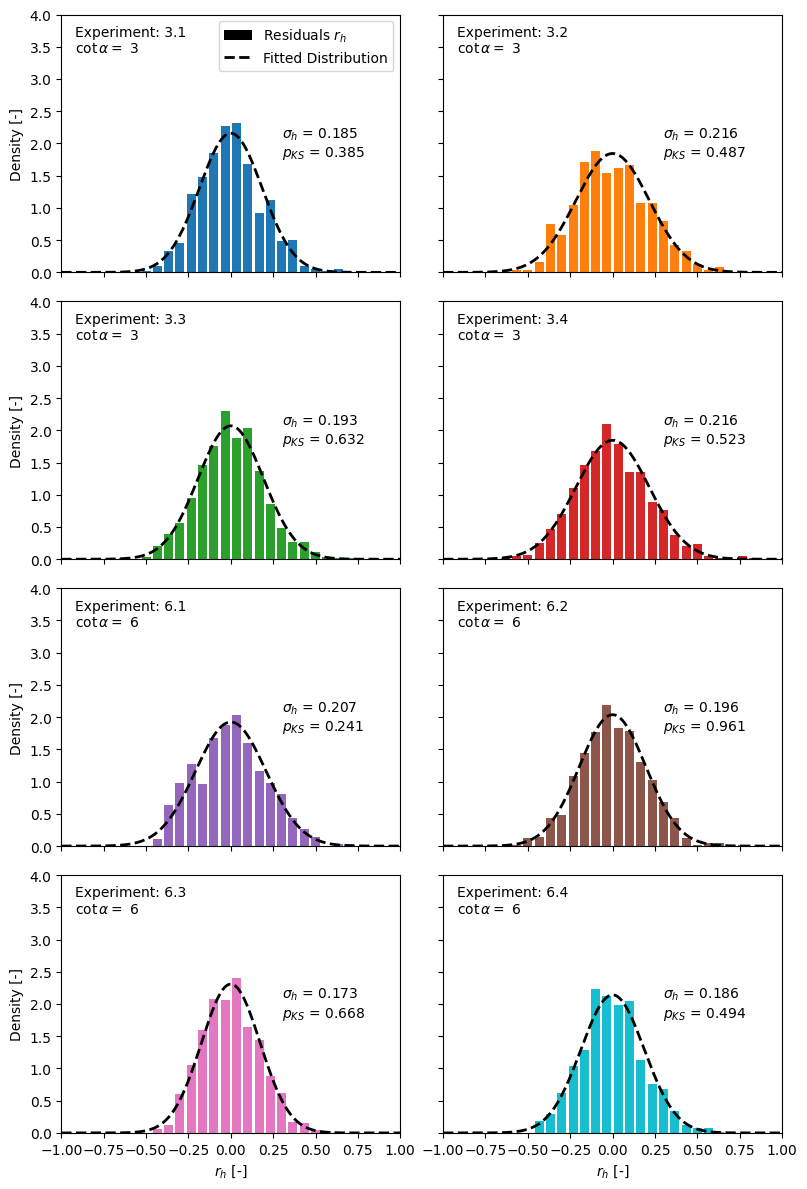

In [10]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8, 12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Fit on residuals
    mu, sigma = norm.fit(_df['rh'])
    df.loc[df['experiment_id'] == expid, 'sigma_h'] = sigma
    
    # Hist
    axs[i].hist(_df['rh'], bins=30, range=[-1.0, 1.0], density=True, color=_df['color'].iloc[0], rwidth=0.8)
    axs[i].hist(_df['rh']-80, bins=30, range=[-80, -79], color="black", rwidth=0.8, label=r"Residuals $r_{h}$") # Legend
    _x = np.linspace(-1, 1, 1000)
    axs[i].plot(_x, norm(mu, sigma).pdf(_x), "--", color="black", lw=2, label="Fitted Distribution")
    
    # KStest
    ks_statistic, ks_p_value = kstest(_df['rh'], 'norm', args=(mu, sigma))
    axs[i].text(0.3, 2.0, r"$\sigma_{h}$ = " + str("{:.3f}".format(round(sigma,3))) + "\n" + r"$p_{KS}$ = " + str("{:.3f}".format(round(ks_p_value,4))), ha='left', va='center')

    # Text
    axs[i].text(-0.92, 3.84, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

[axs[i].set_xlabel(r"$r_{h}$ [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"Density [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="upper right", prop={'size': 10})
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(0, 4)

fig.tight_layout()
fig.align_labels()
plt.show()

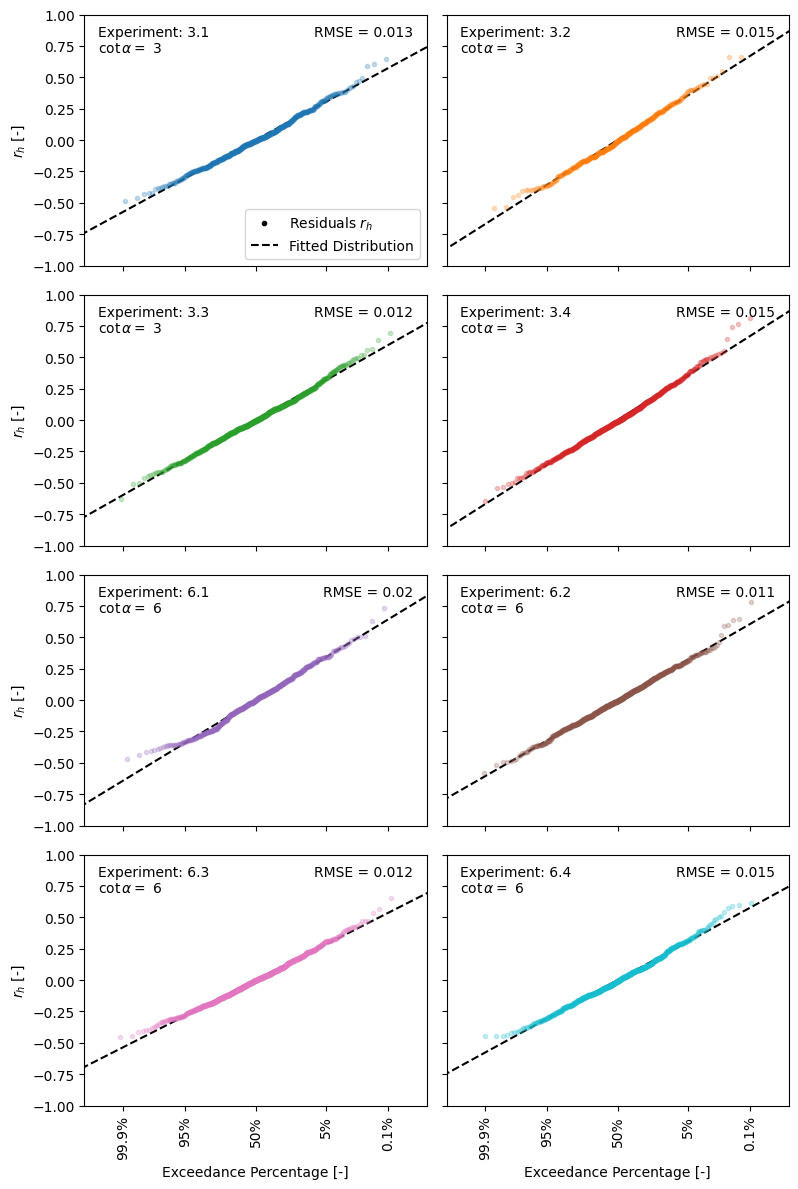

In [11]:
# Plot all
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Residuals
    mu, sigma = norm.fit(_df['rh'])
    data = probplot(_df['rh'])
    
    # Plot
    axs[i].plot(data[0][0], data[0][1], ".", color=_df['color'].iloc[0], alpha=0.25, zorder=3)
    axs[i].plot([-80], [-80], ".", color="black", label=r"Residuals $r_{h}$")
    axs[i].plot([-5, 5], [mu - 5 * sigma, mu + 5 * sigma], "--", color="black", label="Fitted Distribution")
    
    # RMSE
    _y = data[0][1]
    _ypred = data[1][1] + data[0][0] * data[1][0]
    rmse = np.sqrt(np.sum((_y - _ypred)**2) / len(_y))
    axs[i].text(3.68, 0.92, f"RMSE = {round(rmse, 3)}", ha="right", va="top")
     
    # Text
    axs[i].text(-3.68, 0.92, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

pp = np.array([.1, 5, 50, 95, 99.9])
[axs[i].set_xticks(norm.ppf(1 - pp / 100), [f"{_pp}%" if int(_pp) != _pp else f"{round(_pp)}%" for _pp in pp], rotation=90) for i in [4, 5, 6, 7]]    
[axs[i].set_xlabel(r"Exceedance Percentage [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"$r_{h}$ [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="lower right", prop={'size': 10})
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-1, 1)

fig.tight_layout()
fig.align_labels()
plt.show()

<h1>3.3 - Sensitivity of Variation to Experimental Parameters</h1>

<h3>Sensitivity on the waterside slope angle</h3>

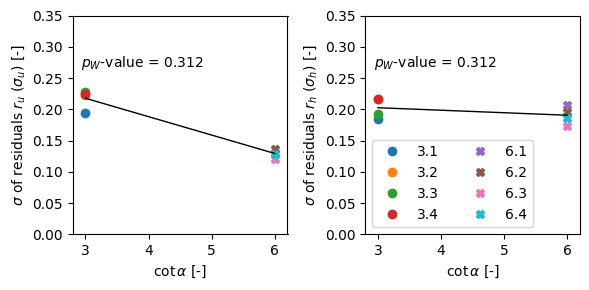

In [12]:
def func(x, a, b):
    return a * x + b

# Plot
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=[6, 3], sharex=True)

# Plot std and trend

# Per experiment
_cota = []
_sigma_u = []
_sigma_h = []
for cota, deeldf in df.groupby(by="cota"):
    for expid, deeldf2 in deeldf.groupby(by="experiment_id"):

        # Plot
        ax0.plot([cota], [deeldf2.iloc[0]['sigma_u']], "o" if cota == 3 else "X", color=deeldf2.iloc[0]['color'], label=f"{expid}")
        ax1.plot([cota], [deeldf2.iloc[0]['sigma_h']], "o" if cota == 3 else "X", color=deeldf2.iloc[0]['color'], label=f"{expid}")

        # Save data for trend line
        _cota.append(cota)
        _sigma_u.append(deeldf2.iloc[0]['sigma_u'])
        _sigma_h.append(deeldf2.iloc[0]['sigma_h'])

# Trend
param3, _ = curve_fit(func, _cota, _sigma_u)
param6, _ = curve_fit(func, _cota, _sigma_h)
ax0.plot([3, 6], func(np.array([3, 6]), *param3), color="black", lw=1)
ax1.plot([3, 6], func(np.array([3, 6]), *param6), color="black", lw=1)

# Wald test
ls = linregress(_cota, _sigma_u)
ls = linregress(_cota, _sigma_h)
ax0.text(2.936, 0.288, r"$p_W$-value = " + str("{:.3f}".format(round(ls.pvalue,3))), ha="left", va="top")
ax1.text(2.936, 0.288, r"$p_W$-value = " + str("{:.3f}".format(round(ls.pvalue,3))), ha="left", va="top")

# Plot layout
ax0.set_xlim(2.8, 6.2)
ax0.set_ylim(0, 0.35)
ax1.set_ylim(0, 0.35)
ax1.legend(loc="lower left", prop={'size': 10}, ncol=2)

ax0.set_xlabel(r"$\cot \alpha$ [-]")
ax1.set_xlabel(r"$\cot \alpha$ [-]")
ax0.set_ylabel(r"$\sigma$ of residuals $r_{u}$ ($\sigma_{u}$) [-]")
ax1.set_ylabel(r"$\sigma_{h,k}$ [-]")
ax1.set_ylabel(r"$\sigma$ of residuals $r_{h}$ ($\sigma_{h}$) [-]")

fig.tight_layout()
fig.align_labels()
plt.show()

<h3>Sensitivity on the wave conditions</h3>

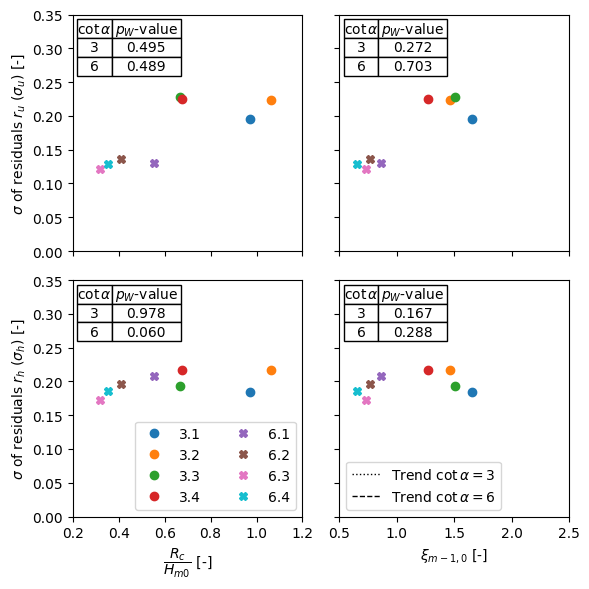

In [28]:
# Plot
fig, axs = plt.subplots(2, 2, figsize=[6,6], sharey=True)
axs = axs.flatten()

# Wave conditions
df['RcHm0'] = df['Rc'] / df['Hs']
df['Ximm10'] = (1 / df['cota']) / np.sqrt(df['Hs'] / (9.81 * df['Tspec'] / (2 * np.pi)))

# Per residuals type
i = 0
for sigma in ["sigma_u", "sigma_h"]:

    # Per wave conditions
    for var in ["RcHm0", "Ximm10"]:

        # Per cota
        ls = []
        for cota, deeldf in df.groupby(by="cota"):

            # Per experiment
            _var = []
            _sigma = []
            for expid, deeldf2 in deeldf.groupby(by="experiment_id"):

                # Plot
                axs[i].plot([deeldf2.iloc[0][var]], [deeldf2.iloc[0][sigma]], "o" if cota == 3 else "X", color=deeldf2.iloc[0]['color'], label=f"{expid}" if i == 2 else None)
                _var.append(deeldf2.iloc[0][var])
                _sigma.append(deeldf2.iloc[0][sigma])

            # Wald test
            ls.append(linregress(_var, _sigma))

            # Add trend line
            _x = np.linspace(np.min(deeldf2[var]), np.max(deeldf2[var]), 2)
            _y = _x * ls[-1].slope + ls[-1].intercept
            axs[i].plot(_x, _y, color="black", lw=1, ls=":" if cota == 3 else "--", label=r"Trend $\cot \alpha = $" + str(cota) if i==3 else None)

        # Add table
        _data = [
            [r"$\cot \alpha$", r"$p_{W}$-value"],
            ["3", "{:.3f}".format(round(ls[0].pvalue, 3))],
            ["6", "{:.3f}".format(round(ls[1].pvalue, 3))]
        ]
        table = axs[i].table(cellText=_data, colWidths=[0.15, 0.3], cellLoc="center", loc="upper left")
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        
        # Increase i by 1
        i += 1

# Plot layout
axs[2].legend(loc="lower right", prop={'size': 10}, ncol=2)
axs[3].legend(loc="lower left", prop={'size': 10}, ncol=1)
axs[2].set_xlabel(r"$\dfrac{R_{c}}{H_{m0}}$ [-]")
axs[3].set_xlabel(r"$\xi_{m-1,0}$ [-]")
axs[0].set_ylabel(r"$\sigma$ of residuals $r_{u}$ ($\sigma_{u}$) [-]")
axs[2].set_ylabel(r"$\sigma$ of residuals $r_{h}$ ($\sigma_{h}$) [-]")

axs[0].set_xlim(0.2, 1.2)
axs[2].set_xlim(0.2, 1.2)
axs[1].set_xlim(0.5, 2.5)
axs[3].set_xlim(0.5, 2.5)
axs[0].set_ylim(0, 0.35)

# Remove ticks from top plots
for i in [0, 1]:
    
    # Get current tick positions and labels from the reference plot
    tick_positions = axs[i+2].get_xticks()
    labels = [item.get_text() for item in axs[i+2].get_xticklabels()]
    empty_string_labels = [''] * len(labels)
    
    # Set the same tick positions before applying the empty labels
    axs[i].set_xticks(tick_positions)
    axs[i].set_xticklabels(empty_string_labels)

fig.tight_layout()
fig.align_labels()
plt.show()

<h1>3.4 - Generalized Distributions of Peak Flow Characteristic Variation</h1>

<h3>Determine standard deviation of the generalized distributions</h3>

In [45]:
# Peak flow velocity
for cota, deeldf in df.groupby(by="cota"):
    _, sigma = norm.fit(deeldf['ru'])
    df.loc[df["cota"] == cota, "gen_sigma_u"] = sigma
    print(f"stdev_u = {sigma:.3f} (cot alpha = {cota})")

# Peak flow thickness
_, sigma_h = norm.fit(df['rh'])
df.loc[:, "gen_sigma_h"] = sigma_h
print(f"stdev_h = {sigma_h:.3f}")

stdev_u = 0.219 (cot alpha = 3)
stdev_u = 0.129 (cot alpha = 6)
stdev_h = 0.195


<h3>Generalized distributions on residuals of peak flow velocity</h3>

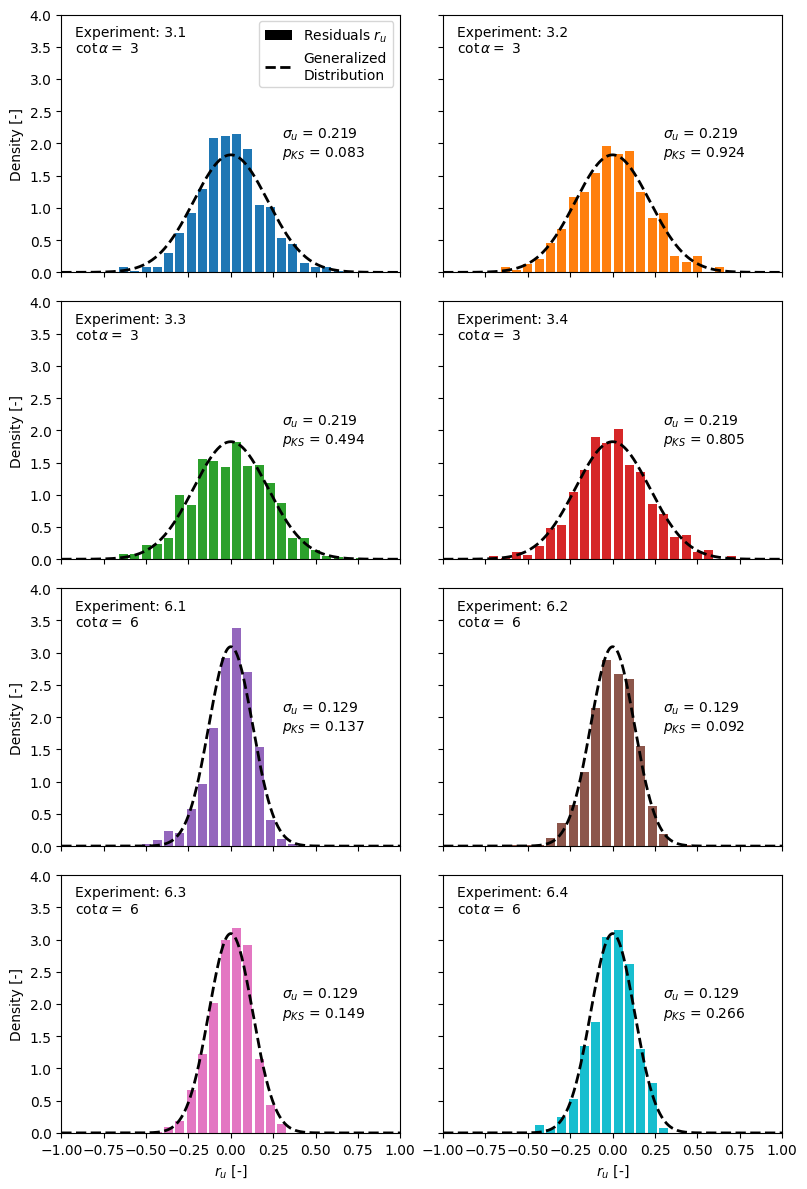

In [43]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8, 12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):

    # Get sigma and mu
    mu = 0
    sigma = _df['gen_sigma_u'].iloc[0]
    
    # Hist
    axs[i].hist(_df['ru'], bins=30, range=[-1.0, 1.0], density=True, color=_df['color'].iloc[0], rwidth=0.8)
    axs[i].hist(_df['ru']-80, bins=30, range=[-80, -79], color="black", rwidth=0.8, label=r"Residuals $r_{u}$") # Legend
    _x = np.linspace(-1, 1, 1000)
    axs[i].plot(_x, norm(mu, sigma).pdf(_x), "--", color="black", lw=2, label="Generalized\nDistribution")
    
    # KStest
    ks_statistic, ks_p_value = kstest(_df['ru'], 'norm', args=(mu, sigma))
    axs[i].text(0.3, 2.0, r"$\sigma_{u}$ = " + str("{:.3f}".format(round(sigma,3))) + "\n" + r"$p_{KS}$ = " + str("{:.3f}".format(round(ks_p_value,4))), ha='left', va='center')

    # Text
    axs[i].text(-0.92, 3.84, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

[axs[i].set_xlabel(r"$r_{u}$ [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"Density [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="upper right", prop={'size': 10})
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(0, 4)

fig.tight_layout()
fig.align_labels()
plt.show()

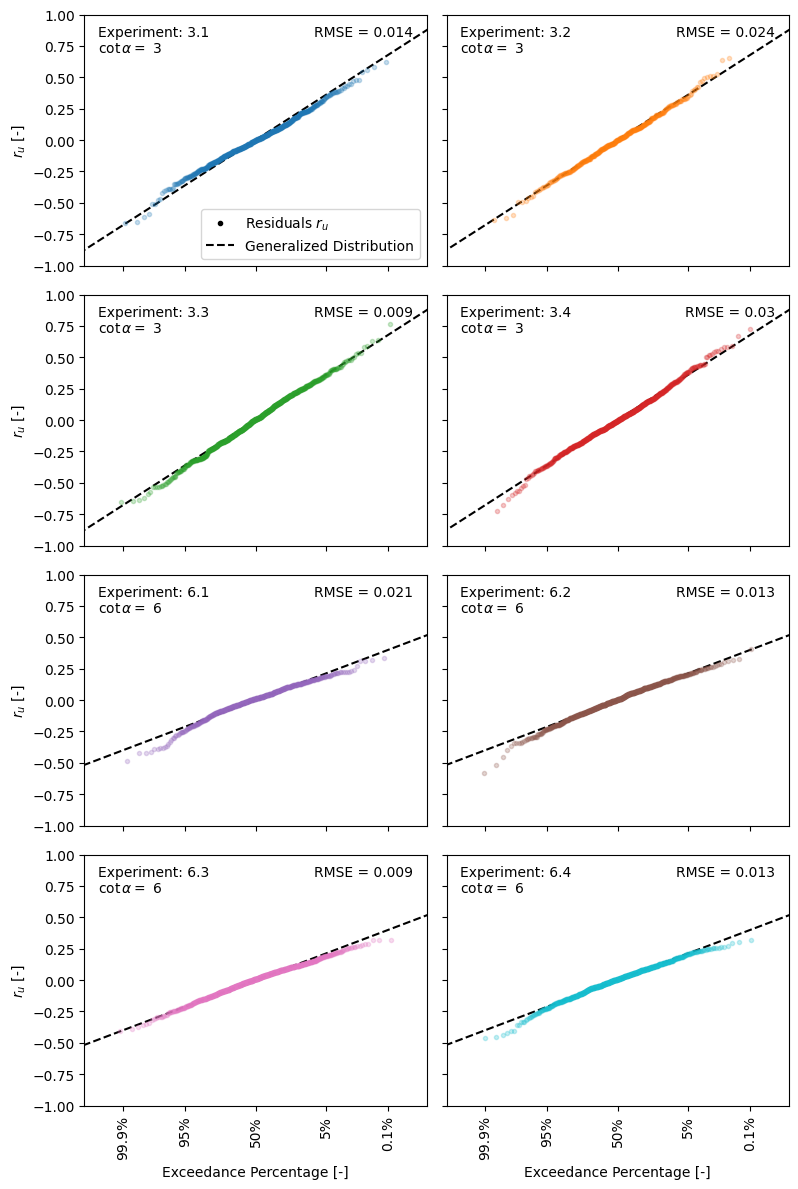

In [41]:
# Plot all
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Residuals
    mu = 0
    sigma = _df['gen_sigma_u'].iloc[0]
    data = probplot(_df['ru'])
    
    # Plot
    axs[i].plot(data[0][0], data[0][1], ".", color=_df['color'].iloc[0], alpha=0.25, zorder=3)
    axs[i].plot([-80], [-80], ".", color="black", label=r"Residuals $r_{u}$")
    axs[i].plot([-5, 5], [mu - 5 * sigma, mu + 5 * sigma], "--", color="black", label="Generalized Distribution")
    
    # RMSE
    _y = data[0][1]
    _ypred = data[1][1] + data[0][0] * data[1][0]
    rmse = np.sqrt(np.sum((_y - _ypred)**2) / len(_y))
    axs[i].text(3.68, 0.92, f"RMSE = {round(rmse, 3)}", ha="right", va="top")
     
    # Text
    axs[i].text(-3.68, 0.92, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

pp = np.array([.1, 5, 50, 95, 99.9])
[axs[i].set_xticks(norm.ppf(1 - pp / 100), [f"{_pp}%" if int(_pp) != _pp else f"{round(_pp)}%" for _pp in pp], rotation=90) for i in [4, 5, 6, 7]]    
[axs[i].set_xlabel(r"Exceedance Percentage [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"$r_{u}$ [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="lower right", prop={'size': 10})
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-1, 1)

fig.tight_layout()
fig.align_labels()
plt.show()

<h3>Generalized distributions on residuals of peak flow thickness</h3>

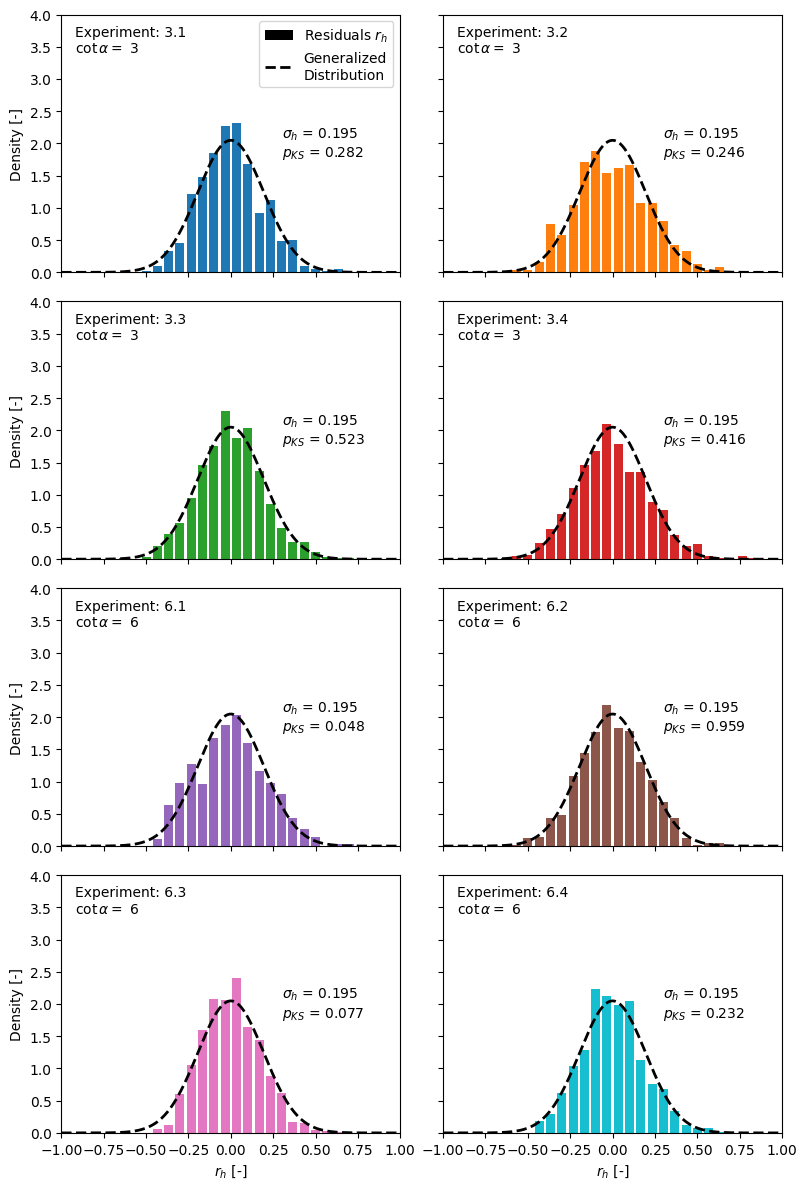

In [46]:
# Plot
fig, axs = plt.subplots(4, 2, figsize=[8, 12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Fit on residuals
    mu = 0
    sigma = _df['gen_sigma_h'].iloc[0]
    
    # Hist
    axs[i].hist(_df['rh'], bins=30, range=[-1.0, 1.0], density=True, color=_df['color'].iloc[0], rwidth=0.8)
    axs[i].hist(_df['rh']-80, bins=30, range=[-80, -79], color="black", rwidth=0.8, label=r"Residuals $r_{h}$") # Legend
    _x = np.linspace(-1, 1, 1000)
    axs[i].plot(_x, norm(mu, sigma).pdf(_x), "--", color="black", lw=2, label="Generalized\nDistribution")
    
    # KStest
    ks_statistic, ks_p_value = kstest(_df['rh'], 'norm', args=(mu, sigma))
    axs[i].text(0.3, 2.0, r"$\sigma_{h}$ = " + str("{:.3f}".format(round(sigma,3))) + "\n" + r"$p_{KS}$ = " + str("{:.3f}".format(round(ks_p_value,4))), ha='left', va='center')

    # Text
    axs[i].text(-0.92, 3.84, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

[axs[i].set_xlabel(r"$r_{h}$ [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"Density [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="upper right", prop={'size': 10})
axs[0].set_xlim(-1, 1)
axs[0].set_ylim(0, 4)

fig.tight_layout()
fig.align_labels()
plt.show()

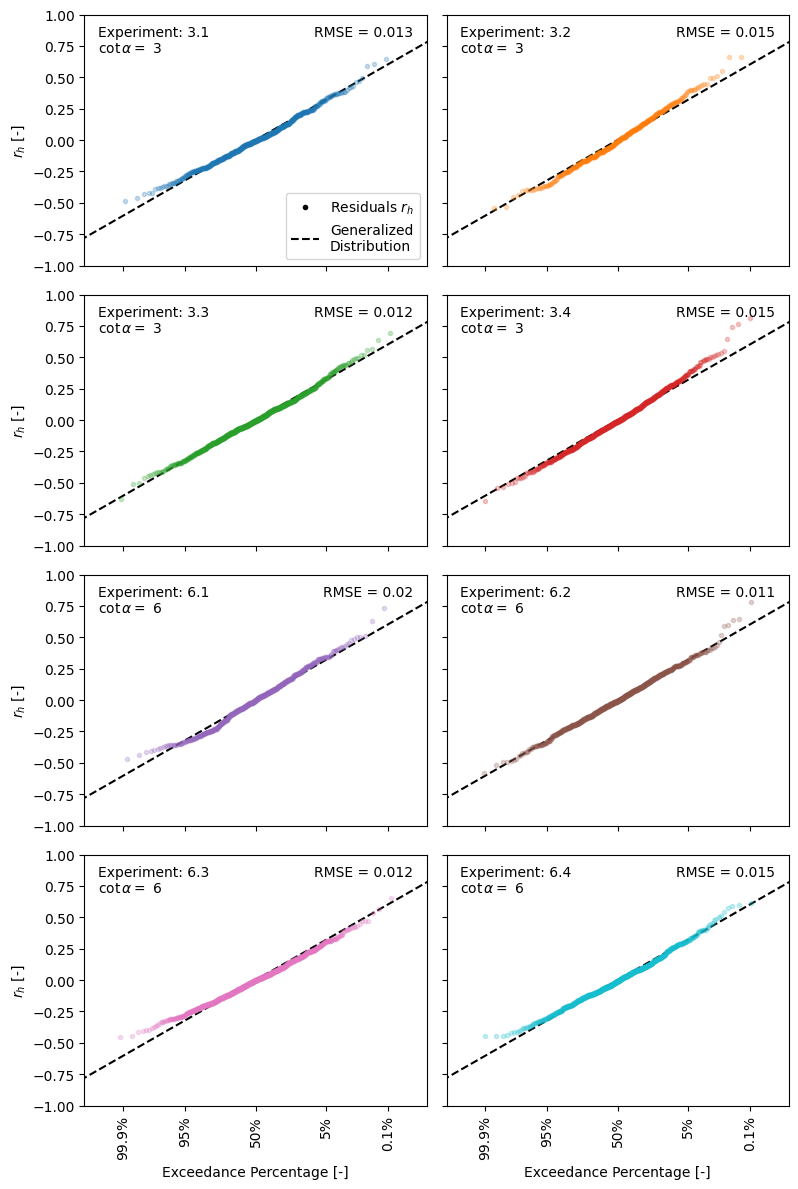

In [47]:
# Plot all
fig, axs = plt.subplots(4, 2, figsize=[8,12], sharex=True, sharey=True)
axs = np.array(axs).flatten()

i = 0
for expid, _df in df.groupby(by="experiment_id"):
    
    # Residuals
    mu = 0
    sigma = _df['gen_sigma_h'].iloc[0]
    data = probplot(_df['rh'])
    
    # Plot
    axs[i].plot(data[0][0], data[0][1], ".", color=_df['color'].iloc[0], alpha=0.25, zorder=3)
    axs[i].plot([-80], [-80], ".", color="black", label=r"Residuals $r_{h}$")
    axs[i].plot([-5, 5], [mu - 5 * sigma, mu + 5 * sigma], "--", color="black", label="Generalized\nDistribution")
    
    # RMSE
    _y = data[0][1]
    _ypred = data[1][1] + data[0][0] * data[1][0]
    rmse = np.sqrt(np.sum((_y - _ypred)**2) / len(_y))
    axs[i].text(3.68, 0.92, f"RMSE = {round(rmse, 3)}", ha="right", va="top")
     
    # Text
    axs[i].text(-3.68, 0.92, f"Experiment: {expid}" + "\n" + r"$\cot \alpha =$ " + f"{round(_df['cota'].iloc[0])}", ha="left", va="top")
    
    # Increase i by 1
    i+=1

pp = np.array([.1, 5, 50, 95, 99.9])
[axs[i].set_xticks(norm.ppf(1 - pp / 100), [f"{_pp}%" if int(_pp) != _pp else f"{round(_pp)}%" for _pp in pp], rotation=90) for i in [4, 5, 6, 7]]    
[axs[i].set_xlabel(r"Exceedance Percentage [-]") for i in [6, 7]]
[axs[i].set_ylabel(r"$r_{h}$ [-]") for i in [0, 2, 4, 6]]
axs[0].legend(loc="lower right", prop={'size': 10})
axs[0].set_xlim(-4, 4)
axs[0].set_ylim(-1, 1)

fig.tight_layout()
fig.align_labels()
plt.show()